<a href="https://colab.research.google.com/github/audreykurvanka/Data_Analisis/blob/main/Audrey_Kurvanka_Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Dingling Air Quality Dataset
- **Nama:** Audrey Kurvanka
- **Email:** audreykurvanka@gmail.com
- **ID Dicoding:** audreykurvanka

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apakah terdapat suatu pola tertentu antara suhu udara dengan tingkat polusi udara?
- Pertanyaan 2: Apakah ada bulan-bulan tertentu dalam setahun yang cenderung memiliki tingkat polusi udara yang lebih tinggi daripada bulan lainnya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
pip install numpy pandas scipy matplotlib seaborn jupyter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
dingling_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")

In [ ]:
# menampilkan 5 baris teratas dari data dingling
dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


### Assessing Data

In [ ]:
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
# menampilkan jumlah missing values pada data dingling
dingling_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [ ]:
# jumlah duplikasi
print("Jumlah duplikasi: ", dingling_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
dingling_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,34924,35021.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Dingling
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4776,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,NaN,1.309808,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


# Data Cleaning

In [ ]:
dingling_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")

In [ ]:
dingling_df.interpolate(method='linear', limit_direction='forward', inplace=True)

In [ ]:
dingling_df.dropna(inplace=True)

In [ ]:
dingling_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [ ]:
dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
2,3,2013,3,1,2,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,2.666667,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,3.333333,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
5,6,2013,3,1,5,6.0,6.0,3.0,4.000000,200.0,79.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Dingling
6,7,2013,3,1,6,5.0,10.0,3.0,4.000000,200.0,77.0,-4.5,1023.4,-19.5,0.0,NNW,1.8,Dingling


In [ ]:
dingling_df.to_csv("dingling_clean.csv", index=False)

In [ ]:
from google.colab import files

cleaned_df = pd.read_csv("dingling_clean.csv")

cleaned_df.to_csv("dingling_clean.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
dingling_df = pd.read_csv("dingling_clean.csv")

In [ ]:
dingling_df.describe(include="all")

In [ ]:
dingling_df.corr()

In [ ]:
# Membuat dataframe yang hanya berisi data suhu udara dan parameter polutan udara
temp_polutan = {
    "TEMP": dingling_df["TEMP"],
    "PM2.5": dingling_df["PM2.5"],
    "PM10": dingling_df["PM10"],
    "SO2": dingling_df["SO2"],
    "NO2": dingling_df["NO2"],
    "CO": dingling_df["CO"],
    "O3": dingling_df["O3"]
}
data_df = pd.DataFrame(temp_polutan)

# Menghitung korelasi antara suhu udara dan parameter polutan udara
correlation_temp = data_df.corr()

# Menampilkan korelasi antara suhu (TEMP) dan parameter kualitas udara
print(correlation_temp["TEMP"])

TEMP     1.000000
PM2.5   -0.088346
PM10    -0.054993
SO2     -0.316158
NO2     -0.308677
CO      -0.280521
O3       0.575579
Name: TEMP, dtype: float64


In [ ]:
# Menjumlahkan nilai polutan dari "PM2.5", "PM10", "SO2", "NO2", "CO", dan "O3"
dingling_df['Total_Pollutants'] = dingling_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].sum(axis=1)

# Menghitung rata-rata total polutan untuk setiap bulan dalam setiap tahun
monthly_averages = dingling_df.groupby(['year', 'month'])['Total_Pollutants'].mean()

print(monthly_averages)

year  month
2013  3        1360.930351
      4         891.905061
      5        1089.886624
      6        1415.018834
      7        1038.789907
      8         895.819733
      9        1071.714883
      10       1746.270181
      11       1153.100892
      12       1243.250915
2014  1        1467.020833
      2        2207.719494
      3        1414.057796
      4        1027.248611
      5         710.727407
      6         664.613068
      7        1101.761290
      8         910.751747
      9         930.643056
      10       1340.039651
      11       1232.891806
      12       1140.883065
2015  1        1746.936167
      2        1500.037325
      3        1210.646640
      4         797.983869
      5         804.422611
      6         882.618359
      7         720.993674
      8         828.965680
      9         771.802925
      10       1054.961590
      11       1990.017207
      12       2360.801771
2016  1        1552.440781
      2         836.238817
      3        1

In [ ]:
# Menentukan bulan dengan rata-rata tertinggi untuk total polutan dalam setiap tahun
max_months = monthly_averages.groupby('year').idxmax()

print("Bulan dengan rata-rata total polutan tertinggi setiap tahun:")
print(max_months)

Bulan dengan rata-rata total polutan tertinggi setiap tahun:
year
2013    (2013, 10)
2014     (2014, 2)
2015    (2015, 12)
2016    (2016, 12)
2017     (2017, 1)
Name: Total_Pollutants, dtype: object


In [ ]:
dingling_df.to_csv("dingling_clean.csv", index=False)

## Visualization & Explanatory Analysis

#### Pertanyaan 1: Apakah terdapat suatu pola tertentu antara suhu udara dengan tingkat polusi udara?

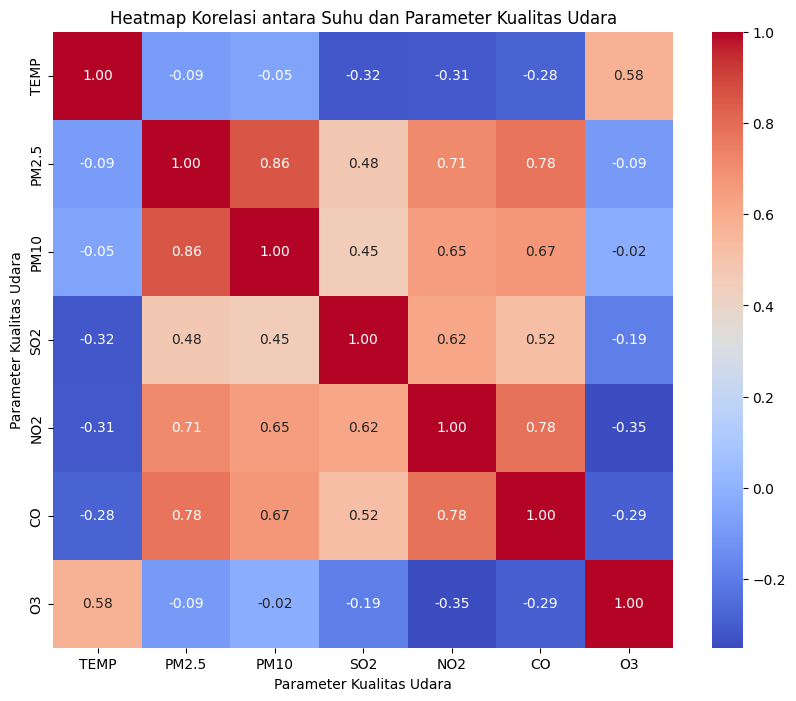

In [ ]:
# Mengatur ukuran visualisasi
plt.figure(figsize=(10, 8))

# Membuat heatmap korelasi
sns.heatmap(correlation_temp, annot=True, cmap='coolwarm', fmt=".2f")

# Memberi judul dan label
plt.title('Heatmap Korelasi antara Suhu dan Parameter Kualitas Udara')
plt.xlabel('Parameter Kualitas Udara')
plt.ylabel('Parameter Kualitas Udara')

# Menampilkan visualisasi
plt.show()

#### Pertanyaan 2:  Apakah ada bulan-bulan tertentu dalam setahun yang cenderung memiliki tingkat polusi udara yang lebih tinggi daripada bulan lainnya?

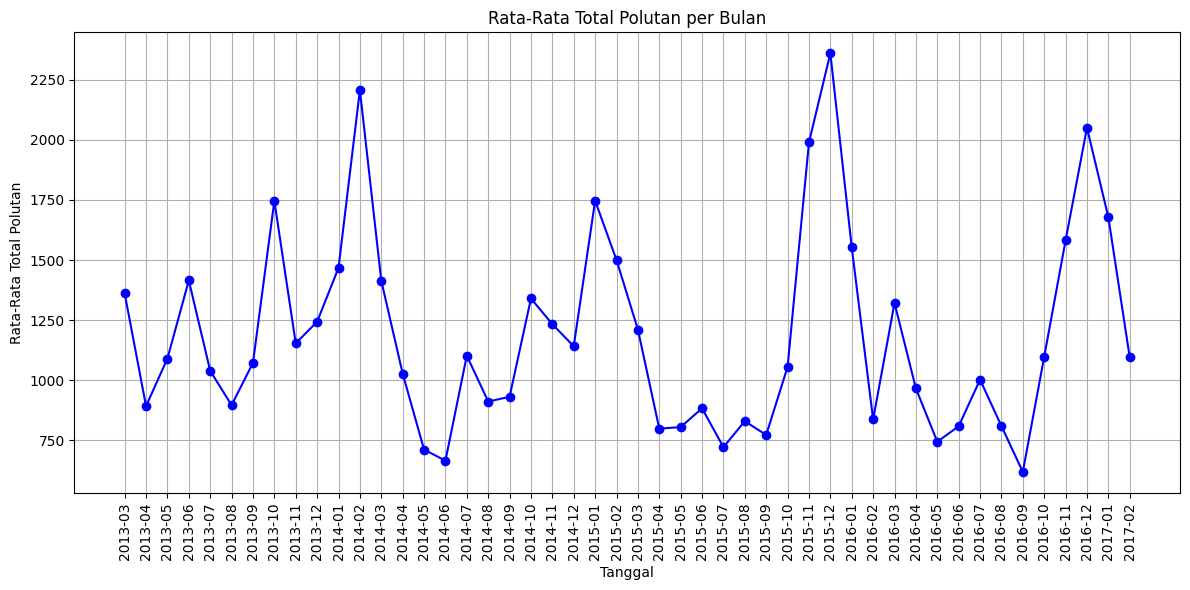

In [ ]:
plt.figure(figsize=(12, 6))
monthly_averages.plot(marker='o', color='b', linestyle='-')
plt.title('Rata-Rata Total Polutan per Bulan')
plt.xlabel('Tanggal')
plt.ylabel('Rata-Rata Total Polutan')
plt.grid(True)
plt.xticks(range(len(monthly_averages)), [f"{year}-{month:02d}" for year, month in monthly_averages.index], rotation=90)
plt.tight_layout()
plt.show()

## Conclusion

- **Conclution pertanyaan 1: Apakah terdapat pola yang jelas antara suhu udara dan tingkat polusi udara?**

Berdasarkan analisis data yang dilakukan, dapat disimpulkan bahwa terdapat pola yang jelas antara suhu udara (TEMP) dengan tingkat polusi udara. Hubungan positif yang signifikan ditemukan antara suhu udara dengan konsentrasi ozon (O3) dengan koefisien korelasi sebesar 0.576. Namun, hubungan negatif yang cukup kuat teramati antara suhu udara dengan polutan lainnya seperti partikulat PM2.5, PM10, SO2, NO2, dan CO, dengan koefisien korelasi berkisar antara -0.055 hingga -0.316. Hal ini menunjukkan bahwa semakin tinggi suhu udara, semakin rendah konsentrasi polutan tersebut dalam udara. Oleh karena itu, dapat disimpulkan bahwa terdapat kecenderungan bahwa semakin tinggi suhu udara, semakin rendah tingkat polusi udara pada polutan PM2.5, PM10, SO2, NO2, dan CO, sementara semakin tinggi suhu udara, semakin tinggi pula konsentrasi ozon dalam udara.

- **Conclution pertanyaan 2: Apakah ada bulan-bulan tertentu dalam setahun yang cenderung memiliki tingkat polusi udara yang lebih tinggi daripada bulan lainnya?**

Pada bulan-bulan tahun tertentu, rata-rata jumlah polutan tertinggi terjadi. Berdasarkan analisis data, saya menemukan bahwa:

*   Pada tahun 2013, bulan dengan rata-rata jumlah polutan tertinggi adalah bulan ke-10 dengan rata-rata sebesar 1746.270181.
*   Pada tahun 2014, bulan dengan rata-rata jumlah polutan tertinggi adalah bulan ke-2 dengan rata-rata sebesar 2207.719494.
*   Pada tahun 2015, bulan dengan rata-rata jumlah polutan tertinggi adalah bulan ke-12 dengan rata-rata sebesar 2360.801771.
*   Pada tahun 2016, bulan dengan rata-rata jumlah polutan tertinggi adalah bulan ke-12 dengan rata-rata sebesar 2050.751015.
*   Pada tahun 2017, hanya terdapat 2 bulan yang terdata. Diantara kedua bulan tersebut, bulan dengan rata-rata jumlah polutan tertinggi adalah bulan ke-1 dengan rata-rata sebsesar 1677.695562.

Hasil analisis tersebut menunjukkan bahwa ada variasi dalam pola polusi udara dari tahun ke tahun, dengan bulan-bulan tertentu pada setiap tahunnya memiliki tingkat polusi udara yang lebih tinggi dibandingkan bulan lainnya.